<h1  style="text-align: center"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">NYC Taxi Trip Duration</span>  </h1> 

$$\underline{\textbf{Problem Statement}}$$

At some point or the other almost each one of us has used an Ola or Uber for taking a ride. 

Ride hailing services are services that use online-enabled platforms to connect between passengers and local drivers using their personal vehicles. In most cases they are a comfortable method for door-to-door transport. Usually they are cheaper than using licensed taxicabs. Examples of ride hailing services include Uber and Lyft.

<img src="2560px-Ride_hailing_services_Wikivoyage_banner.jpg">

To improve the efficiency of taxi dispatching systems for such services, $\textbf{it is important to be able to predict how long a driver will have his taxi occupied}$. If a dispatcher knew approximately when a taxi driver would be ending their current ride, they would be better able to identify which driver to assign to each pickup request.

In this competition, we are challenged $\textbf{to build a model that predicts the total ride duration of taxi trips in New York City.}$

<h1  style="text-align: center"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Exploratory Data Analysis</span>  </h1> 

Now, we are going to dive dipper into the data, according to the data description we have the following columns:

 - **id**: a unique identifier for each trip
 - **vendor_id**: a code indicating the provider associated with the trip record
 - **pickup_datetime**: date and time when the meter was engaged
 - **dropoff_datetime**: date and time when the meter was disengaged
 - **passenger_count**: the number of passengers in the vehicle (driver entered value)
 - **pickup_longitude**: the longitude where the meter was engaged
 - **pickup_latitude**: the latitude where the meter was engaged
 - **dropoff_longitude**: the longitude where the meter was disengaged
 - **dropoff_latitude**: the latitude where the meter was disengaged
 - **store_and_fwd_flag**: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)
 - **trip_duration**: (target) duration of the trip in seconds

Here, we have 2 variables dropoff_datetime and store_and_fwd_flag which are not available before the trip starts and hence will not be used as features to the model.

In [85]:
## Loading important libraries for analysis

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)          ## Setting display for having a better look at dataframe 
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

import matplotlib.pyplot as plt                    ## Plotting libraries
import seaborn as sns
sns.set()                               ## Makes all matplotlib plots set in seaborn style

import scipy.stats as stats       # For Statistical Analysis and hypothesis testing

from datetime import timedelta             ## Date Time libraries
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('nyc_taxi_trip_duration.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [3]:
print(f'Our data has {df.shape[0]} rows and {df.shape[1]} features.')

Our data has 729322 rows and 11 features.


<h1  style="text-align: center"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Datatype Information</span>  </h1>

In [4]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [5]:
print(f'There are {df.dtypes.value_counts()[0]} "Object" (Categorical) variables, {df.dtypes.value_counts()[1]} "float64" (Numerical) and {df.dtypes.value_counts()[2]} "int64" (Numerical) variables.')

There are 4 "Object" (Categorical) variables, 4 "float64" (Numerical) and 3 "int64" (Numerical) variables.


We can drop the column 'id' as it has all the values unique, which would be not helpful in making any prediction later.

In [6]:
del(df['id'])        ## Deleting the 'id' column from the dataframe

In [7]:
df.head()            ## Confirming...

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


<h1  style="text-align: center"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Missing Values</span>  </h1>

In [8]:
df.isna().sum()

vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Fortunately, we do not have any missing values in our data.

<h1  style="text-align: center"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Datatype Conversion</span>  </h1>

We observed that some columns in our dataframe have not been assigned with their respective datatype. We need to convert them to remove any inconsistency from our data.

In [9]:
# Converting the object datatype to datetime

df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)

## Mapping the store_and_fwd_flag column to numerical values, just before the model building

df['vendor_id'] = df['vendor_id'].astype('object')  ## Because, vendor_id is a category

df.dtypes     ## Now, the datatypes are fine

vendor_id                     object
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

<h1  style="text-align: center"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Categorical Vs Numerical Columns</span>  </h1>

In [10]:
## Selecting Categorical and Numerical Columns 

cat_cols = df.select_dtypes(include = np.object).columns.tolist() ## Removing ID as it is not really needed
num_cols = df.select_dtypes(exclude = np.object).columns.tolist()

print('******************************Categorical Columns****************************')
print(cat_cols)
print(' ')
print('******************************Numerical Columns****************************')
print(num_cols)

******************************Categorical Columns****************************
['vendor_id', 'store_and_fwd_flag']
 
******************************Numerical Columns****************************
['pickup_datetime', 'dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_duration']


<h1  style="text-align: center"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Univariate Analysis</span>  </h1>

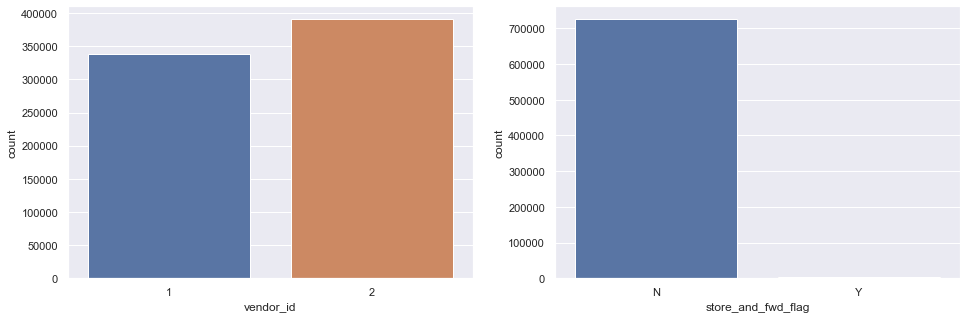

In [11]:
fig, ax = plt.subplots(1,2, figsize = (16, 5))      ## Categorical variables
sns.countplot(df['vendor_id'], ax = ax[0])
sns.countplot(df['store_and_fwd_flag'], ax = ax[1])
fig.show()

* vendor 2 has more number of customers than vendor 1.
* store_and_fwd_flag values show whether there was any data storage in the taxi before sending to the vendor (Y) or not (N). The graphs shows that there was no such storage taking place in the taxis. 

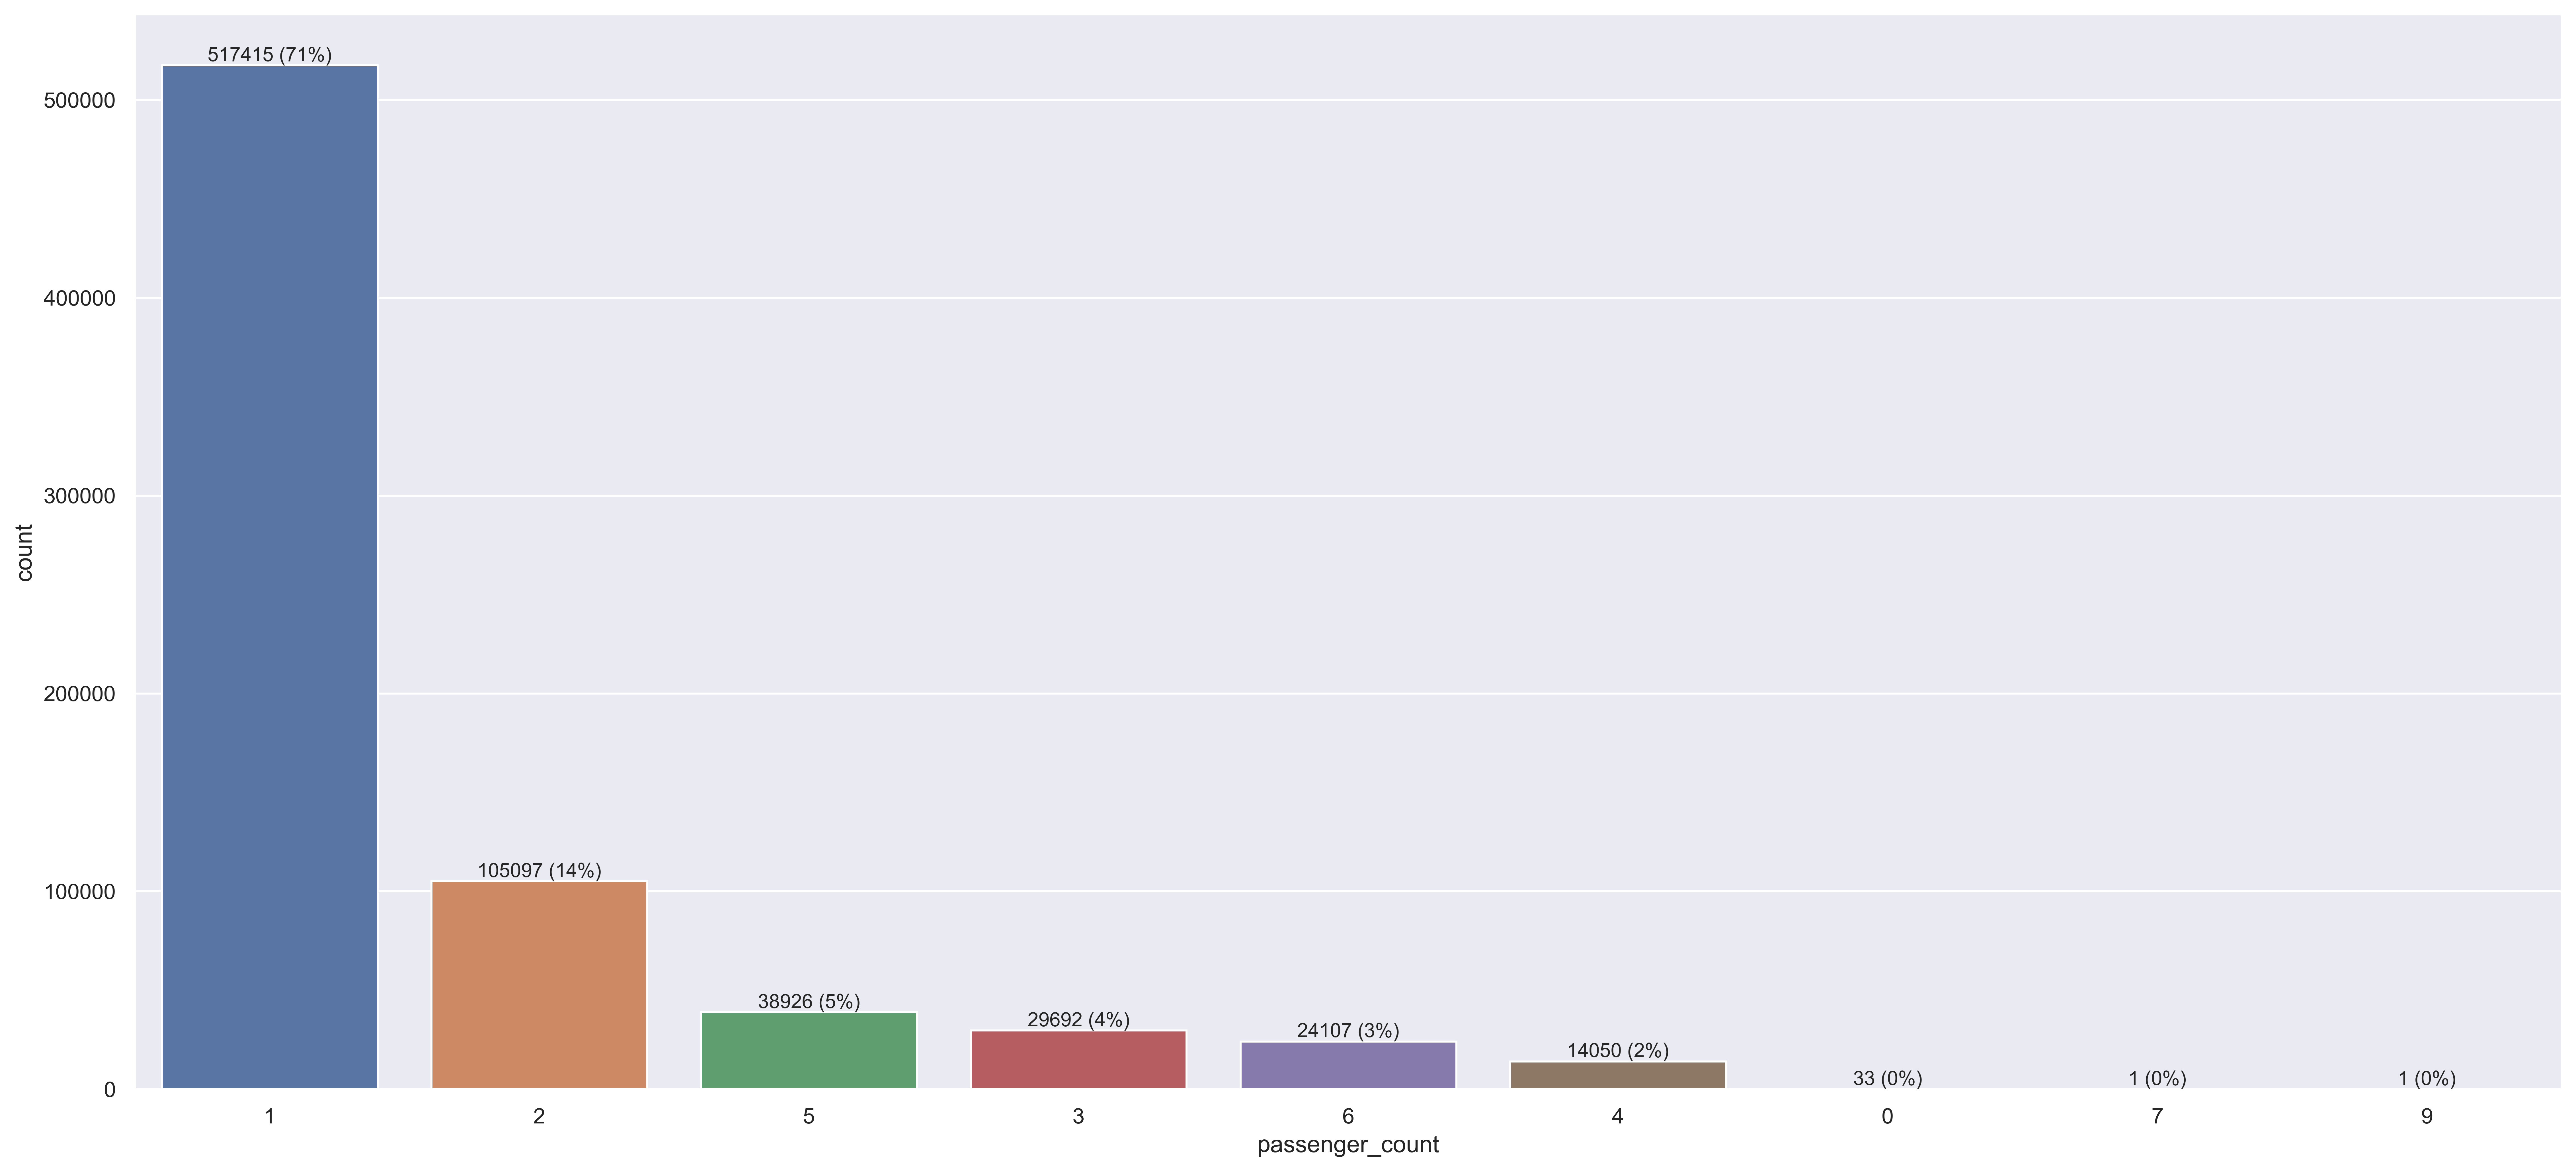

In [12]:
## Passenger Count Variable ##
    
plt.figure(figsize=(22,10), dpi=500)    # Setting the figure  

ax = sns.countplot(x = df['passenger_count'], order = df['passenger_count'].value_counts(ascending = False).index)
        
abs_values = df['passenger_count'].value_counts(ascending=False)
rel_values = df['passenger_count'].value_counts(ascending=False, normalize=True).values * 100

lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container = ax.containers[0], labels = lbls)
plt.show()

* Majority rides have single passenger count (71%) followed by 2 and 5 passenger count.

In [13]:
## Trip Duration ##

df['trip_duration'].describe()/3600   ## Trip duration in hours

count    202.589444
mean       0.264508
std        1.073507
min        0.000278
25%        0.110278
50%        0.184167
75%        0.298611
max      538.815556
Name: trip_duration, dtype: float64

We can observe that majority of the values (75%) are $\textbf{17 mins (approx)}$, but we have a trip with $\textbf{539 hours}$ of duration, which is a $\textbf{huge outlier}$. We will have to remove this in order to make our target variable (trip_duration) normal. We can further look into the distribution of data to confirm this.

In [14]:
def visual(name):
    plt.figure(figsize=(16, 6))                   ## Fixing the figure size ##
    mini = df[name].min()
    maxi = df[name].max()
    ran = df[name].max() - df[name].min()     ## Range of distribution
    mean = df[name].mean()
    median = df[name].median()
    st_dev = df[name].std()
    skew = df[name].skew()
    kurt = df[name].kurtosis()

    points = mean-st_dev, mean+st_dev

    sns.kdeplot(x = df[name], shade=True)
    sns.lineplot(x = points, y = [0, 0], color = 'green', label = "std_dev")
    sns.scatterplot(x = [mini,maxi], y = [0, 0], color = 'orange', label = "min/max")
    sns.scatterplot(x = [mean], y = [0], color = 'red', label = "mean")
    sns.scatterplot(x = [median], y = [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format('trip_duration'), fontsize = 12)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                    round(kurt,2),
                                                                                                    round(skew,2),
                                                                                                    (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                    round(mean,2),
                                                                                                    round(median,2)))
    plt.show()

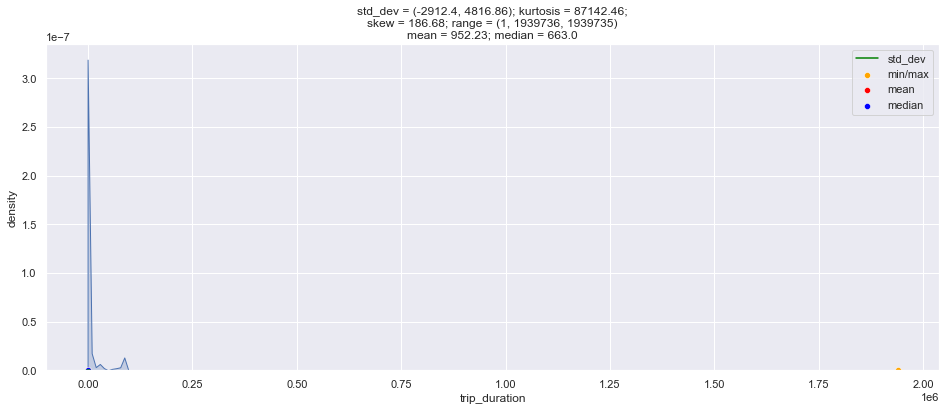

In [15]:
visual('trip_duration')

* We further confirm that our data is highly skewed towards right and has a huge value of outlier. One way to solve this is to perform log transformation on the 'trip_duration' column.

In [16]:
df['log_trip_duration'] = np.log1p(df['trip_duration'].values)    ## log1p adds 1 to each value, avoids log error

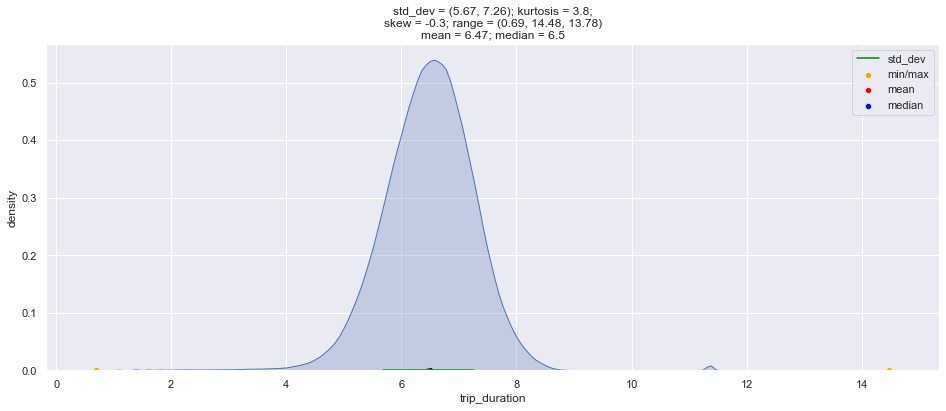

In [17]:
visual('log_trip_duration')

Now, we can see a much more smoother curve with very low skewness and normally distributed.

* Majority of rides (75%) are at 6.5, which is $e^{6.5} = 665 secs = 17$ mins and we also have some rides with duration smaller than 10 seconds which is suspicious but our overall distirbution follows normality.

## Looking into Datatime variables

In [18]:
df['pickup_datetime'].min(), df['pickup_datetime'].max()   ## Min and max values for datetime

(Timestamp('2016-01-01 00:01:14'), Timestamp('2016-06-30 23:59:37'))

* It can be seen that we have have the data for a duration of 6 months, hence we can dive deeper into months, weekdays, hour of the day and other important features.

In [19]:
## Making new features for storing new values

df['day_of_week'] = df['pickup_datetime'].dt.weekday   # 0: Monday, 6: Sunday
df['hour_of_day'] = df['pickup_datetime'].dt.hour

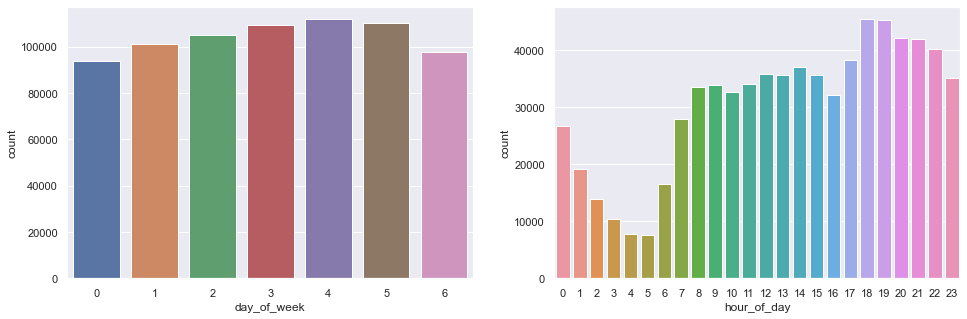

In [20]:
fig, ax = plt.subplots(1,2, figsize = (16, 5))      ## Categorical variables
sns.countplot(df['day_of_week'], ax = ax[0])
sns.countplot(df['hour_of_day'], ax = ax[1])
fig.show()

* The number of passengers increases as the week progresses, i.e., Monday (0) has minimum taxis rides which increases gradually and maximise on Friday (4). Weekends Saturday(5) and Sunday (6) can be observed with a drop in taxis.

* There are lower number of taxi trips during the first 6 hrs (12 AM - 6 AM) which gradually increase till 2 PM. There is small drop after 2, which makes sense because people do not prefer to travel during lunch hours and then we see the increase in the taxi counts in the evening (around 6PM - 7PM). 

<h1  style="text-align: center"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Bivariate Analysis</span>  </h1>

Now, we would try to look into the relationship between the variables, i.e., Numerical-Numerical, Numerical-Categorical and Categorical-Categorical and test several hypothesis to choose relevant features and relationships.

In [89]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
    '''
    takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
    '''
    from numpy import sqrt, abs, round
    from scipy.stats import norm

   # z = ((x_1bar - x_2bar) - (mu1- mu2))/ sqrt([sigma_1_2/n1 + sigma_2_2/n2])

    ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
    z = (X1 - X2)/ovr_sigma
    pval = 2*(1 - norm.cdf(abs(z)))           # cdf is the Cumulative density function
    
    return pval

In [90]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
    '''
    takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
    '''
    from numpy import sqrt, abs, round
    from scipy.stats import t as t_dist
    
    ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
    t = (X1 - X2)/ovr_sd
    df = n1+n2-2
    pval = 2*(1 - t_dist.cdf(abs(t),df))     # Takes degree of freedom and t-value
    
    return pval

In [95]:
def Bivariate_cont_cat(data, cont, cat, category):      ## Combination of the two functions above
  #creating 2 samples
    x1 = data[cont][data[cat]==category][:]       ## Filtering the categories
    x2 = data[cont][~(data[cat]==category)][:]
  
     #calculating descriptives
    n1, n2 = x1.shape[0], x2.shape[0]
    m1, m2 = x1.mean(), x2.mean()
    std1, std2 = x1.std(), x2.mean()
  
     #calculating p-values
    t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
    z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

    #table
    table = pd.pivot_table(data = data, values = cont, columns = cat, aggfunc = np.mean)
    
      ## Creates a pivot table for our categorical Vs Continuous variables

    #plotting
    plt.figure(figsize = (15,6), dpi=140)
  
    #barplot
    plt.subplot(1,2,1)
    sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
    plt.ylabel('mean {}'.format(cont))
    plt.xlabel(cat)
    plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val, z_p_val, table))

    # boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=cat, y=cont, data=data)
    plt.title('categorical boxplot')
    
    if t_p_val < 0.05 and z_p_val < 0.05 :    # alpha value is 0.05 or 5%
        print("We are rejecting null hypothesis")
    else:
        print("We are accepting null hypothesis")
  

<h1  style="text-align: center"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Hypothesis Testing</span>  </h1>

$\textbf{1.}$ Do the trips with less number of passengers tend to have longer trip duration?

$\textbf{2.}$ Does the weekends on an average have longer trip durations than on the weekdays?

$\textbf{3.}$ Does the hour of the day have a significant impact on average duration of trip?

$\textbf{4.}$ Does the vendor 1 has a higher average trip duration than vendor 2?

$\textbf{5.}$ Vendor 2 has significantly more number of trip records in the memory of vehicles than vendor 1?


In [21]:
## Selecting Categorical and Numerical Columns 

cat_cols = df.select_dtypes(include = np.object).columns.tolist() ## Removing ID as it is not really needed
num_cols = df.select_dtypes(exclude = np.object).columns.tolist()

print(cat_cols)
print(' ')
print(num_cols)

['vendor_id', 'store_and_fwd_flag']
 
['pickup_datetime', 'dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'log_trip_duration', 'day_of_week', 'hour_of_day']


$$\underline{\textbf{1. Do the trips with less number of passengers tend to have average longer trip duration?}}$$

In [22]:
hy_1 = df.groupby('passenger_count')['trip_duration'].mean().sort_values(ascending = False)
hy_1

passenger_count
5    1085.312953
6    1084.088232
3    1026.482285
4    1013.849181
2     995.422191
1     921.403438
9     560.000000
0     403.969697
7      19.000000
Name: trip_duration, dtype: float64

In [23]:
df.groupby('passenger_count')['trip_duration'].median().sort_values(ascending = False)

passenger_count
4    701.0
2    690.0
3    686.0
5    668.5
6    660.0
1    655.0
9    560.0
0     22.0
7     19.0
Name: trip_duration, dtype: float64

<AxesSubplot:xlabel='passenger_count', ylabel='trip_duration'>

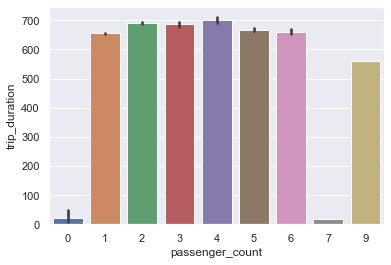

In [25]:
sns.barplot(y = 'trip_duration', x = 'passenger_count',data = df,estimator = np.median)

From the above analysis, we can see that when using mean as an estimator there is a significant difference in the trip duration with passenger counts, but when using median, there is no significant difference. 

* This confirms that the distribution of trip duration for each passenger count is rather skewed and has some outliers, hence there is no significant difference in the trip_duration wrt to the passenger count.

We accept the null hypotheis.

We observed some trips with 0 passengers but having a positive value for the trip_duration, we can look deeper into these trips.

In [30]:
df_0 = df[df['passenger_count'] == 0]
df_0.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,day_of_week,hour_of_day
3572,1,2016-02-13 14:04:20,2016-02-13 14:21:29,0,-73.990479,40.742004,-73.989243,40.763680,N,1029,6.937314,5,14
23847,1,2016-05-11 19:15:57,2016-05-11 19:32:18,0,-73.987572,40.754566,-73.972031,40.762836,N,981,6.889591,2,19
45987,1,2016-03-06 05:24:55,2016-03-06 05:25:00,0,-73.979698,40.761196,-73.979698,40.761196,Y,5,1.791759,6,5
76998,1,2016-02-28 01:08:48,2016-02-28 01:09:01,0,-74.035942,40.736488,-74.035942,40.736492,N,13,2.639057,6,1
101709,2,2016-01-17 20:51:55,2016-01-17 20:52:43,0,-73.959999,40.766861,-73.960106,40.766911,N,48,3.891820,6,20


* The reason for the passenger count to be 0, can be that the cancellation of the taxi before the arrival for pickup.
* Another reason, maybe completing the taxi trip count by the rider.

$$\underline{\textbf{2. Does the weekends on an average have longer trip durations than on the weekdays?}}$$

<AxesSubplot:xlabel='day_of_week', ylabel='trip_duration'>

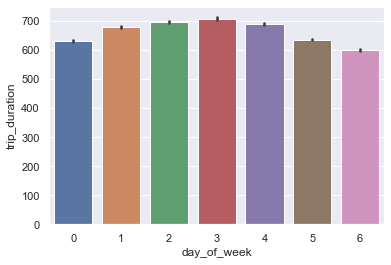

In [113]:
sns.barplot(y = 'trip_duration', x = 'day_of_week',data = df,estimator = np.median)

<AxesSubplot:xlabel='day_of_week', ylabel='trip_duration'>

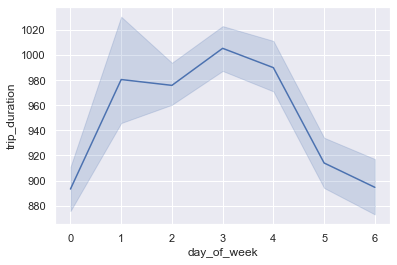

In [112]:
sns.lineplot(x = 'day_of_week',y = 'trip_duration',data = df)

* From the above visualisations, it can be seen that weekdays have longer durations probably due to traffic when compared to weekends. Hence, weekdays have longer trip durations than the weekends.

$$\underline{\textbf{3. Does the hour of the day have a significant impact on average duration of trip?}}$$

<AxesSubplot:xlabel='hour_of_day', ylabel='trip_duration'>

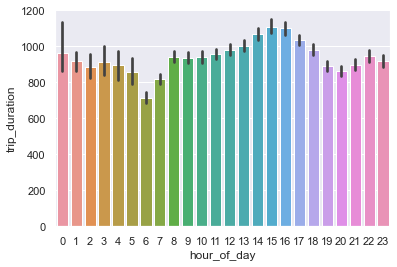

In [39]:
sns.barplot(y = 'trip_duration', x = 'hour_of_day',data = df,estimator = np.mean)

<AxesSubplot:xlabel='hour_of_day', ylabel='trip_duration'>

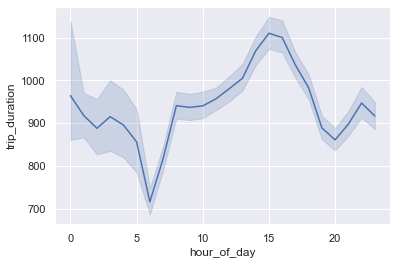

In [111]:
sns.lineplot(x='hour_of_day',y='trip_duration',data=df)

* From above graphs, it can be seen that trip durations on an average are higher during 12-18 hrs (12 PM to 6 PM). Hence, we accept the alternate hypothesis that hour of the day play an important role in the average duration of the trip.

* Trip durations are definitely shorter for late night and early morning hours that can be attributed to low traffic density.

* It follows a similar pattern when compared to number of pickups indicating a correlation between number of pickups and trip duration

$$\underline{\textbf{4. Does the vendor 1 has a higher average trip duration than vendor 2?}}$$

In [87]:
df_1 = df[['vendor_id', 'trip_duration']]                 # 'vendor_id' is category and 'trip_duration' is numerical
df_1['vendor_id'] = df_1['vendor_id'].map({1: 1, 2: 0})

df_1['vendor_id'] = df_1['vendor_id'].astype('category')  ## Converting the datatype to category

vendor_1_td = df_1[df_1['vendor_id'] == 1]['trip_duration']    # All trips with vendor_id = 1

vendor_2_td = df_1[df_1['vendor_id'] == 0]['trip_duration']    # All trips with vendor_id = 2

_,p_value=stats.ttest_ind(a=vendor_1_td,b=vendor_2_td,equal_var=False)   ## Performing t-test,
print(f'p-value from our analysis is : {p_value}')
print('')

if p_value < 0.05:    # alpha value is 0.05 or 5%
    print("We are rejecting null hypothesis")
else:
    print("We are accepting null hypothesis")

p-value from our analysis is : 5.364650355789116e-128

We are rejecting null hypothesis


We are rejecting null hypothesis


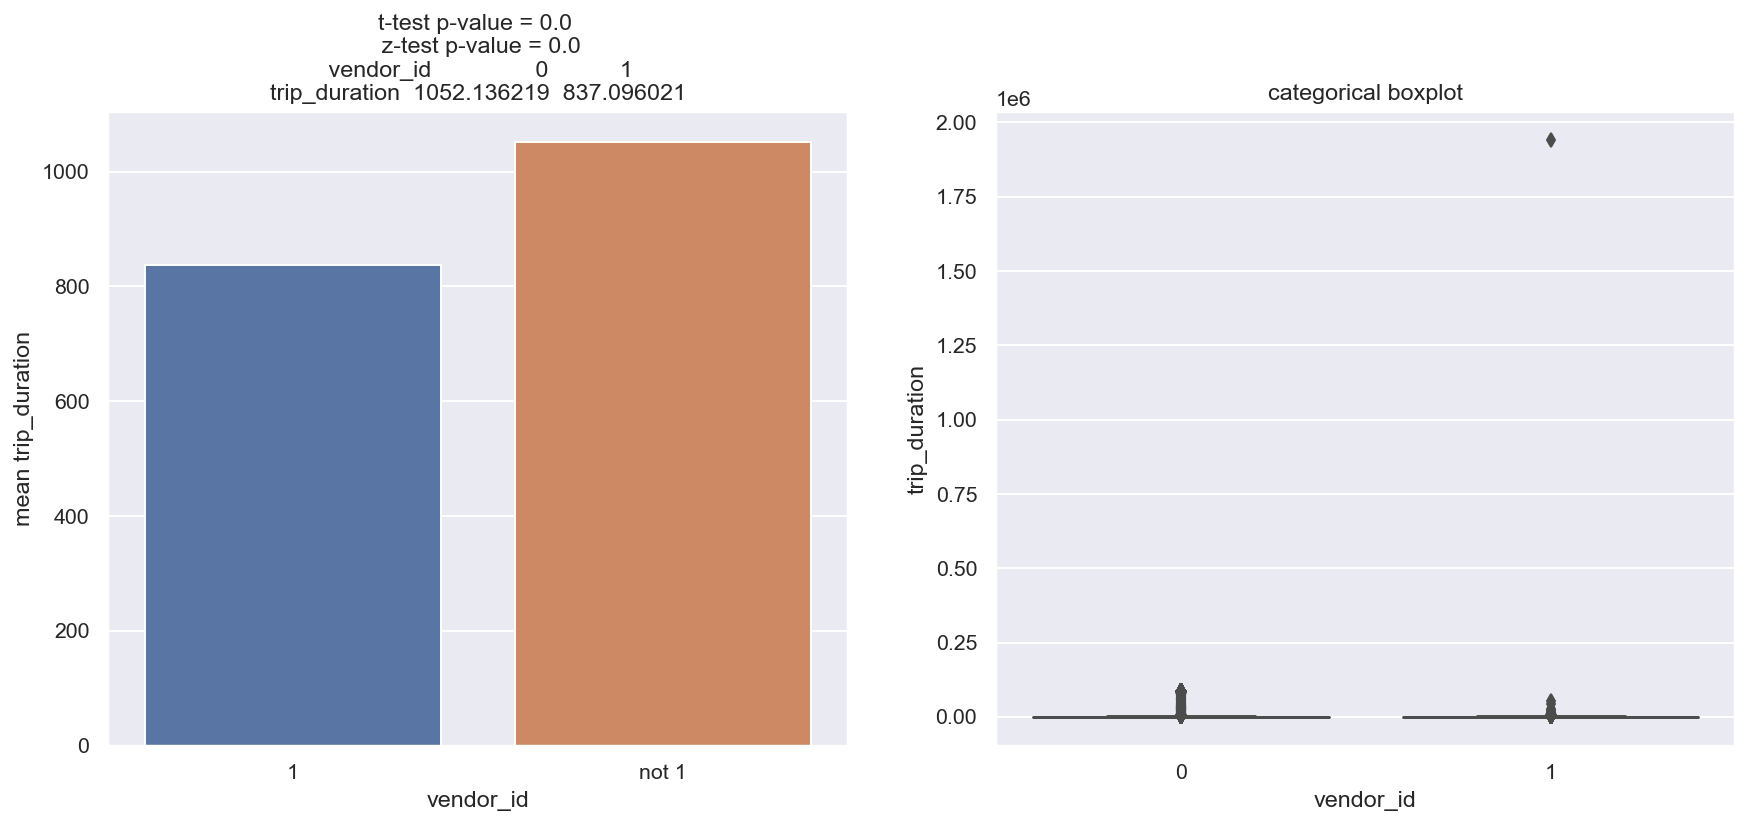

In [96]:
Bivariate_cont_cat(df_1, 'trip_duration', 'vendor_id', 1)

Hence, we reject the null hypothesis that there is no difference in the average trip duration of both vendors.

$$\underline{\textbf{5. Vendor 2 has significantly more number of trip records in the memory of vehicles than vendor 1?}}$$

In [102]:
df_1 = df[['vendor_id', 'store_and_fwd_flag']]                 # 'vendor_id' is category and 'trip_duration' is numerical
df_1['vendor_id'] = df_1['vendor_id'].map({1: 1, 2: 0})

df_1['vendor_id'] = df_1['vendor_id'].astype('category')  ## Converting the datatype to category
df_1['store_and_fwd_flag'] = df_1['store_and_fwd_flag'].astype('category')  ## Converting the datatype to category

df_table=pd.crosstab(df_1['vendor_id'],df_1['store_and_fwd_flag'])

Observed_Values = df_table.values

val = stats.chi2_contingency(df_table)

Expected_Values = val[3]

no_of_rows=len(df_table.iloc[0:2,0])
no_of_columns=len(df_table.iloc[0,0:2])
ddof = (no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom: ",ddof)

alpha = 0.05

from scipy.stats import chi2
chi_square = sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic = chi_square[0] + chi_square[1]

p_value = 1 - chi2.cdf(x = chi_square_statistic,df = ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

Degree of Freedom:  1
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.0


In [104]:
if p_value <= alpha:
    print("Reject null hypothesis,There is a relationship between 2 categorical variables")
else:
    print("Retain hypothesis,There is no relationship between 2 categorical variables")

Reject null hypothesis,There is a relationship between 2 categorical variables


In [107]:
def BVA_categorical_plot(data, tar, cat):
    '''
    take data and two categorical variables,
    calculates the chi2 significance between the two variables 
    and prints the result with countplot & CrossTab
    '''
    #isolating the variables
    data = data[[cat,tar]][:]

    #forming a crosstab
    table = pd.crosstab(data[tar],data[cat],)
    f_obs = np.array([table.iloc[0][:].values,            ## Observed table
                    table.iloc[1][:].values])

    #performing chi2 test
    from scipy.stats import chi2_contingency             ## This calculates the expected table automatically
    chi, p, dof, expected = chi2_contingency(f_obs)
  
    # checking whether results are significant
    if p<0.05:
        sig = True
    else:
        sig = False

    #plotting grouped plot
    sns.countplot(x=cat, hue=tar, data=data)
    plt.title("p-value = {}\n difference significant ? = {}\n".format(round(p,8),sig))

    # plotting percent stacked bar plot
    # sns.catplot(ax, kind='stacked')
    ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
    ax1.plot(kind='bar', stacked='True',title=str(ax1))
    int_level = data[cat].value_counts()

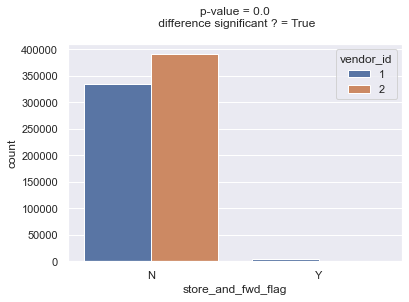

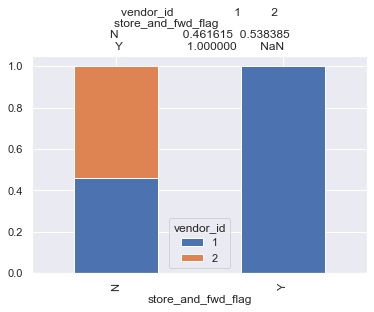

In [109]:
BVA_categorical_plot(df, 'vendor_id', 'store_and_fwd_flag')

Hence, we reject the null hypothesis and come to the conclusion that there were more not stores and forward trip from Vendor 2 than vendor 1.

$$\underline{\textbf{Conclusions}}$$

- The majority of rides follow a rather smooth distribution that looks almost log-normal with a peak just around exp(6.5)  i.e. about 17 minutes.   

- There are several suspiciously short rides with less than 10 seconds duration.

- Majority rides have single passenger count (71%) followed by 2 and 5 passenger count. There are trips with 7-9 passengers but they are very low in number.

- Vendor 2 has more number of trips as compared to vendor 1.

- Number of pickups for weekends is much lower than week days with a peak on Friday (5). Note that here weekday is an integer, where 0 is Monday and 6 is Sunday.

- Number of pickups as expected is highest in late evenings. However, it is much lower during the morning peak hours.

- Trip durations are definitely shorter for late night and early morning hours that can be attributed to low traffic density.

- It follows a similar pattern when compared to number of pickups indicating a correlation between number of pickups and trip duration.

- Mean trip duration vary signicantly as can be seen from hypothesis testing for different vendors.
